In [2]:
import numpy as np
import pandas as pd

### Tasks

#### 1 Read the data from the CSV file into a DataFrame and display the first five rows.

In [3]:
df = pd.read_csv("data/exams.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### 2 Display the basic information for the DataFrame and its columns using the info()
method

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3 Display statistical information for the math score, reading score, and writing score columns using the describe() method.

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### 4 Group the data by the race/ethnicity column and display the mean scores.

In [6]:
df.groupby(["race/ethnicity"])[["math score", "reading score", "writing score"]].mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


#### 5 Display column “gender” as a DataFrame with bracket notation. XX[[XXX]]

In [7]:
df[["gender"]]

,gender
0,female
1,female
2,female
3,male
4,male
...,...
995,female
996,male
997,female
998,female


#### 6 Display column “gender” as a Series with bracket notation. XX[XXX]

In [8]:
df["gender"]

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object

#### 7 Display column “gender” as a Series with dot notation. XX.XXX

In [9]:
df.gender

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object

#### Display only rows for females with a math score greater than or equal to 90 using the
query() method.

In [10]:
df.columns
df2 = df.rename(columns={'math score': 'math_score'})
df2.query("gender == 'female' and math_score >=90")



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading score,writing score
2,female,group B,master's degree,standard,none,90,95,93
114,female,group E,bachelor's degree,standard,completed,99,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
263,female,group E,high school,standard,none,99,93,90
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
474,female,group B,associate's degree,standard,completed,90,90,91
501,female,group B,associate's degree,standard,completed,94,87,92
503,female,group E,associate's degree,standard,completed,95,89,92


#### Questions

#### Q1 Does taking a test preparation course improve average scores?

In [14]:
df.groupby(["test preparation course"])[["math score", "reading score", "writing score"]].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


Yes, taking the test preparation course does improve the avergae score by about 5-10 points

#### Q2 Which gender is better on average at math?

In [15]:
df.groupby(["gender"])["math score"].mean()

gender
female    63.633205
male      68.728216
Name: math score, dtype: float64

On an average male students perform better at math

#### Q3 Which gender is better on average at all three subjects? Hint: Start by adding a column to the DataFrame with the total score

In [20]:
df["Avg_score"] = df["math score"] + df["reading score"] + df["writing score"]
df["Avg_score"] = df["Avg_score"] / 3

df.groupby(["gender"])["Avg_score"].mean()

gender
female    69.569498
male      65.837483
Name: Avg_score, dtype: float64

On avegrage Female students are better at all three subjects

#### Q4 Does the parents’ level of education have an effect on the average scores?

<Axes: xlabel='parental level of education'>

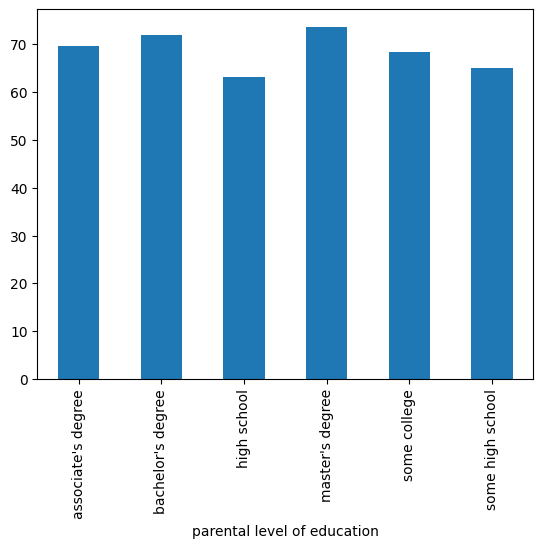

In [26]:
df.groupby(["parental level of education"])["Avg_score"].mean().plot(kind="bar")

<Axes: >

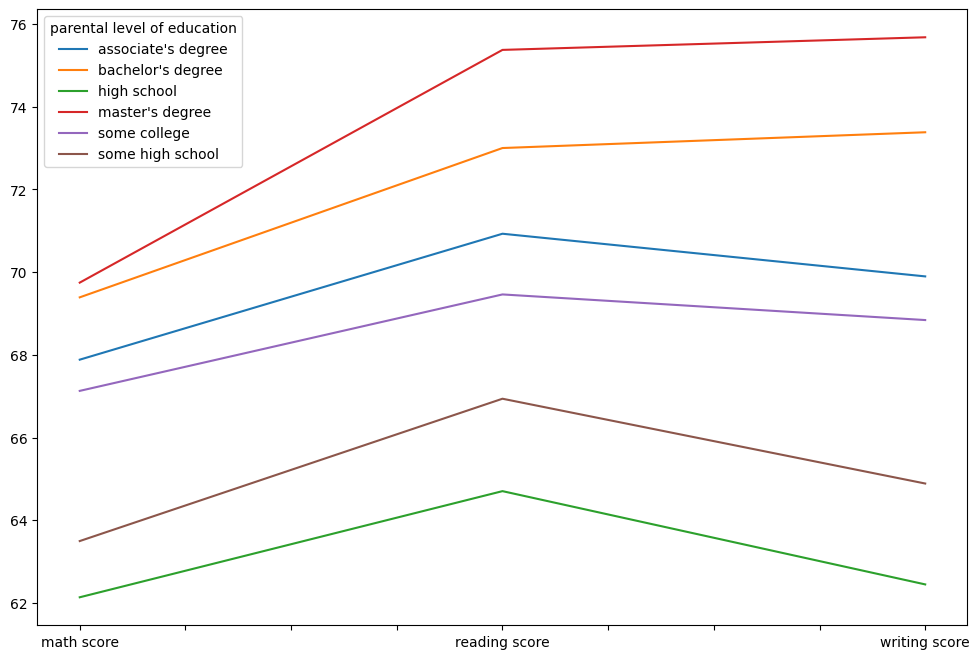

In [28]:
df.groupby('parental level of education')[['math score', 'reading score','writing score']].mean().T.plot(figsize=(12,8))

Yes, Parent's level of education does play a role. Children, on an average, tend to score higher when their parents have a higher level of education like a bachelor's or master's degree.
From the graphs it is clear that the average score goes down when the parents have a low level of education.